In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
!pip install scikit-learn

In [10]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


Number Of Samples: 450
Total Dataset Size:
n_samples: 450
n_features: 90000
n_classes: 450
Extracting the top 150 eigenfaces from 337 faces


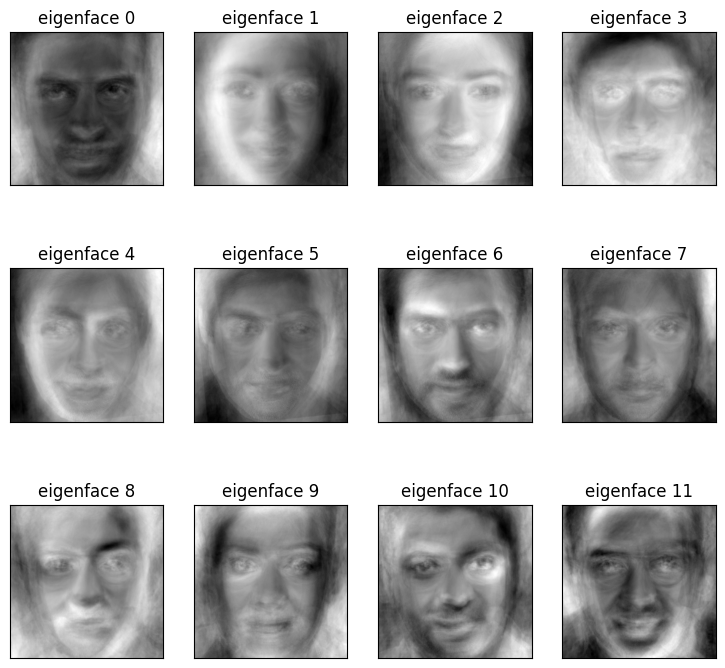

Projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)
Iteration 1, loss = 2.68175587
Iteration 2, loss = 2.51794044
Iteration 3, loss = 2.37372234
Iteration 4, loss = 2.24115203
Iteration 5, loss = 2.11413511
Iteration 6, loss = 1.99886422
Iteration 7, loss = 1.88660773
Iteration 8, loss = 1.78063576
Iteration 9, loss = 1.67942207
Iteration 10, loss = 1.58420244
Iteration 11, loss = 1.49481902
Iteration 12, loss = 1.40768867
Iteration 13, loss = 1.32522698
Iteration 14, loss = 1.24639769
Iteration 15, loss = 1.17134979
Iteration 16, loss = 1.09979458
Iteration 17, loss = 1.03165565
Iteration 18, loss = 0.96708143
Iteration 19, loss = 0.90605640
Iteration 20, loss = 0.84879478
Iteration 21, loss = 0.79475587
Iteration 22, loss = 0.74339963
Iteration 23, loss = 0.69606423
Iteration 24, loss = 0.65075727
Iteration 25, loss = 0.60923402
Iteration 26, loss = 0.57004956
Iteration 27, loss = 0.53341117
Iteration 28, loss = 0.49875960
Iteration 29, loss = 0.466650

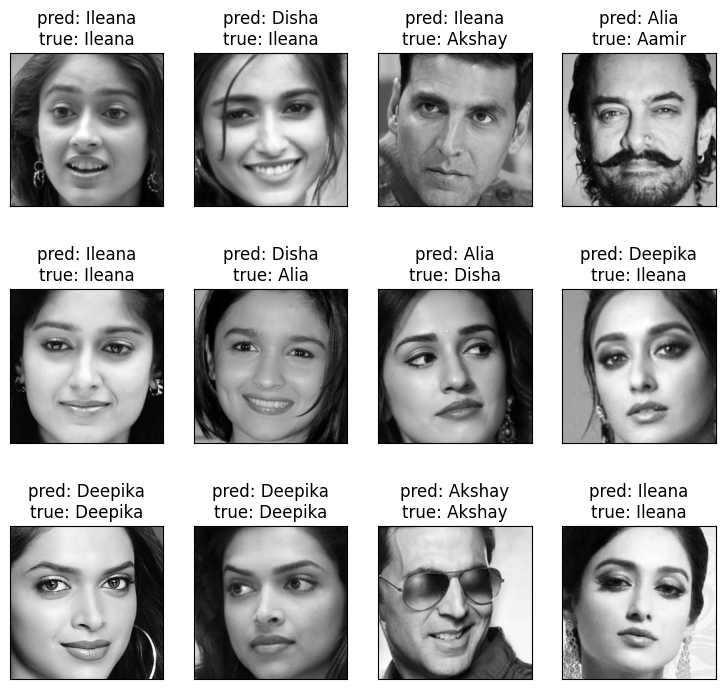

In [50]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import numpy as np
import os
import cv2

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

dir_name = "dataset/faces/"
y = []
X = []
h = w = 300
n_samples = 0

for person_name in os.listdir(dir_name):
    dir_path = os.path.join(dir_name, person_name)
    for image_name in os.listdir(dir_path):
        image_path = os.path.join(dir_path, image_name)
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(gray, (h, w))
        v = resized_image.flatten()
        X.append(v)
        n_samples += 1
        y.append(person_name)

y = np.array(y)
X = np.array(X)

print("Number Of Samples:", n_samples)
n_classes = 450

print("Total Dataset Size:")
print("n_samples:", n_samples)
print("n_features:", X.shape[1])
print("n_classes:", n_classes)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

n_components = 150

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)

clf = MLPClassifier(random_state=1, hidden_layer_sizes=(100,), max_iter=1000, verbose=True).fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

prediction_titles = []
true_positive = 0

for i in range(y_pred.shape[0]):
    true_name = y_test[i]
    pred_name = y_pred[i]
    result = 'pred: %s\ntrue: %s' % (pred_name, true_name)
    prediction_titles.append(result)
    if true_name == pred_name:
        true_positive += 1

accuracy = true_positive * 100 / y_test.shape[0]
print("Accuracy:", accuracy, "%")

plot_gallery(X_test, prediction_titles, h, w)
plt.show()
